In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv('house_price_preprocessing.csv')
df.head()

,Unnamed: 0,지역명,규모구분,연도,월,분양가격
0,0,서울,전체,2015,10,5841
1,1,서울,전용면적 60㎡이하,2015,10,5652
2,2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,4,서울,전용면적 102㎡초과,2015,10,5879


In [48]:
null_count = df.isnull().sum()
null_count

Unnamed: 0    0
지역명           0
규모구분          0
연도            0
월             0
분양가격          0
dtype: int64

In [49]:
df.loc[df['분양가격']==0]

,Unnamed: 0,지역명,규모구분,연도,월,분양가격
28,28,광주,전용면적 85㎡초과 102㎡이하,2015,10,0
29,29,광주,전용면적 102㎡초과,2015,10,0
34,34,대전,전용면적 102㎡초과,2015,10,0
81,81,제주,전용면적 60㎡이하,2015,10,0
113,113,광주,전용면적 85㎡초과 102㎡이하,2015,11,0
...,...,...,...,...,...,...
4461,4461,세종,전용면적 60㎡이하,2020,2,0
4488,4488,전남,전용면적 85㎡초과 102㎡이하,2020,2,0
4493,4493,경북,전용면적 85㎡초과 102㎡이하,2020,2,0
4499,4499,경남,전용면적 102㎡초과,2020,2,0


In [50]:
idx = df.loc[df['분양가격']==0].index
idx
# 0의 갯수가 320개

Int64Index([  28,   29,   34,   81,  113,  114,  119,  166,  198,  199,
            ...
            4418, 4448, 4453, 4458, 4459, 4461, 4488, 4493, 4499, 4503],
           dtype='int64', length=320)

In [51]:
df = df.drop(idx,axis = 0)

In [19]:
df.count()

Unnamed: 0    4185
지역명           4185
규모구분          4185
연도            4185
월             4185
분양가격          4185
dtype: int64

In [52]:
df

,Unnamed: 0,지역명,규모구분,연도,월,분양가격
0,0,서울,전체,2015,10,5841
1,1,서울,전용면적 60㎡이하,2015,10,5652
2,2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,4,서울,전용면적 102㎡초과,2015,10,5879
...,...,...,...,...,...,...
4498,4498,경남,전용면적 85㎡초과 102㎡이하,2020,2,3247
4500,4500,제주,전체,2020,2,3955
4501,4501,제주,전용면적 60㎡이하,2020,2,4039
4502,4502,제주,전용면적 60㎡초과 85㎡이하,2020,2,3962


In [53]:
df['분양가격'] = df['분양가격']/3.3

df = df.rename(columns={'분양가격':'평당 분양가격'})
df

,Unnamed: 0,지역명,규모구분,연도,월,평당 분양가격
0,0,서울,전체,2015,10,1770.000000
1,1,서울,전용면적 60㎡이하,2015,10,1712.727273
2,2,서울,전용면적 60㎡초과 85㎡이하,2015,10,1782.424242
3,3,서울,전용면적 85㎡초과 102㎡이하,2015,10,1733.636364
4,4,서울,전용면적 102㎡초과,2015,10,1781.515152
...,...,...,...,...,...,...
4498,4498,경남,전용면적 85㎡초과 102㎡이하,2020,2,983.939394
4500,4500,제주,전체,2020,2,1198.484848
4501,4501,제주,전용면적 60㎡이하,2020,2,1223.939394
4502,4502,제주,전용면적 60㎡초과 85㎡이하,2020,2,1200.606061


In [54]:
import warnings
warnings.filterwarnings("ignore")

import os

if os.name =='posix':
    plt.rc("font",family = "AppleGothic")
else:
    plt.rc("font",family = "Malgun Gothic")
plt.figure(figsize=(12,8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [60]:
df.groupby('지역명')['평당 분양가격'].mean()
df.head()

,Unnamed: 0,지역명,규모구분,연도,월,평당 분양가격
0,0,서울,전체,2015,10,1770.000000
1,1,서울,전용면적 60㎡이하,2015,10,1712.727273
2,2,서울,전용면적 60㎡초과 85㎡이하,2015,10,1782.424242
3,3,서울,전용면적 85㎡초과 102㎡이하,2015,10,1733.636364
4,4,서울,전용면적 102㎡초과,2015,10,1781.515152


<Axes: xlabel='지역명', ylabel='평당 분양가격'>

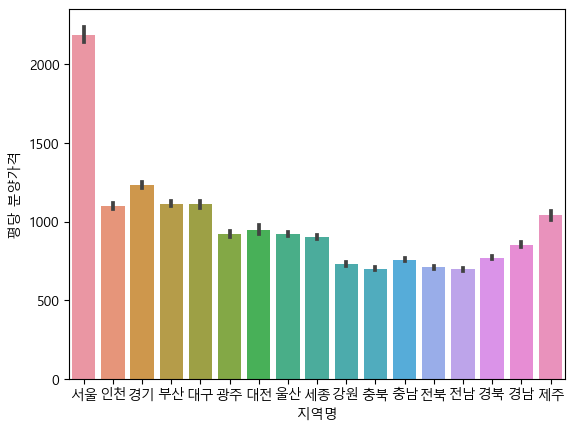

In [61]:
sns.barplot(data = df, x = '지역명',y = '평당 분양가격')

<Axes: xlabel='연도', ylabel='평당 분양가격'>

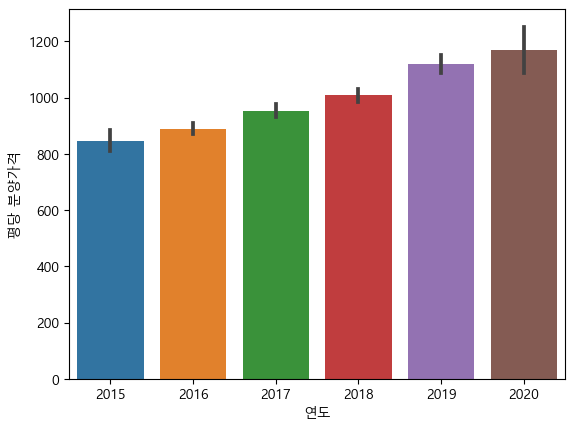

In [57]:
# 연도별 분양가격

sns.barplot(data = df,x='연도',y='평당 분양가격')